In [19]:
import matplotlib.pyplot as plt

In [20]:
# численность
x_init = 0.1
y_init = 0.1

# коэф. собственной скорости роста вида
a1 = 1
a2 = 1.5

# самоограничение численности (внутривидовой конкуренции)
b1 = 1
b2 = 0.7

# взаимодействие видов
c1 = 0.1
c2 = 0.8

dt = 0.1
t_limit = 20

In [21]:
def x_der(x, y):
    return (a1 - b1 * x - c1 * y) * x


def y_der(x, y):
    return (a2 - b2 * y - c2 * x) * y

In [22]:
def runge_kutta4(x, y, t):
    k1x = x_der(x, y) * t
    k1y = y_der(x, y) * t
    k2x = x_der(x + k1x/2, y + k1y/2) * t
    k2y = y_der(x + k1x/2, y + k1y/2) * t
    k3x = x_der(x + k2x/2, y + k2y/2) * t
    k3y = y_der(x + k2x/2, y + k2y/2) * t
    k4x = x_der(x + k3x, y + k3y) * t
    k4y = y_der(x + k3x, y + k3y) * t
    return x + (k1x + 2*k2x + 2*k3x + k4x) / 6, y + (k1y + 2*k2y + 2*k3y + k4y) / 6

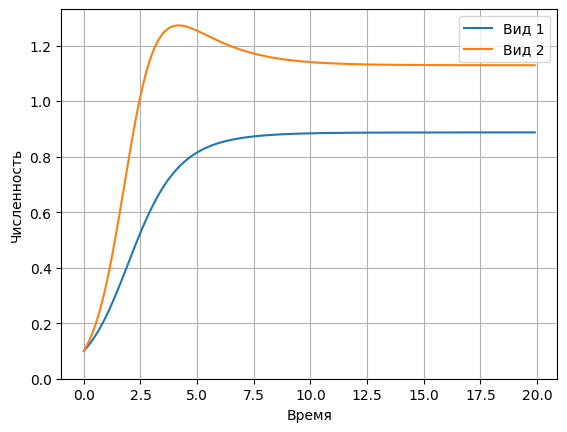

In [23]:
def solver(x_init, y_init):
    x_list = [x_init]
    y_list = [y_init]

    for i in range(num_of_iter - 1):
        temp = runge_kutta4(x_list[i], y_list[i], dt)
        x_list.append(temp[0])
        y_list.append(temp[1])
    return x_list, y_list

num_of_iter = int(t_limit / dt)
t_list = [i * dt for i in range(num_of_iter)]
result = solver(x_init, y_init)

plt.plot(t_list, result[0], label='Вид 1')
plt.plot(t_list, result[1], label='Вид 2')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.grid()
plt.legend()
plt.gca().set_ylim(bottom=0)
plt.show()

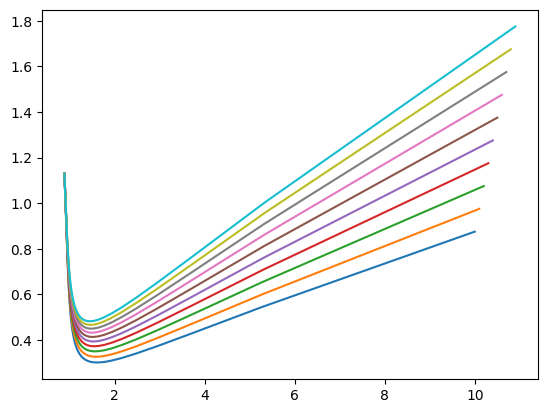

In [24]:
x_init_list = [b1 / c1 + i * 0.1 for i in range(10)]
y_init_list = [b2 / c2 + i * 0.1 for i in range(10)]

for i in range(len(x_init_list)):
    temp = solver(x_init_list[i], y_init_list[i])
    plt.plot(temp[0], temp[1])

# plt.scatter([a1 / b1], [a2 / b2])
plt.show()